In [12]:
import sys

# Append the directory path to sys.path, not the file path
sys.path.append('/content/drive/My Drive/Master Thesis Spring 2024')

# Now import the module by its name, without the .py extension
from preprocessing import preprocessing_histgrad


In [13]:
!pip install optuna

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import optuna

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.inspection import permutation_importance

from optuna.visualization import plot_optimization_history, plot_param_importances, plot_parallel_coordinate, plot_contour, plot_slice

In [16]:
X_train, Y_train, X_test, Y_test, df_encoded = preprocessing_histgrad("TINE.Ystekar.Norvegia.v1.csv", train_index=1459)

In [ ]:
# Define and fit the model
hgbr_regressor = HistGradientBoostingRegressor(random_state=0)
hgbr_regressor.fit(X_train, Y_train)

# Calculate permutation importance
result = permutation_importance(hgbr_regressor, X_train, Y_train, n_repeats=50, random_state=0, n_jobs=-1, scoring='neg_mean_squared_error')

# Sort features based on their importance scores
sorted_idx = result.importances_mean.argsort()

# Select top N important features, adjust N as needed
N = 30
top_n_indices = sorted_idx[-N:]

top_n_feature_names = [X_train.columns[i] for i in top_n_indices]

# Print out the top N features with their names and scores
print("Top N important features and their permutation importance scores:")
for i in top_n_indices[::-1]:  # Iterate in reverse to start with the most important feature
    print(f"{X_train.columns[i]}: {result.importances_mean[i]:.3f}")



Top N important features and their permutation importance scores:
Bu_cut2casomaticTime: 0.106
Bs_temp_Temp_stage26: 0.066
Bs_ph_pH2: 0.035
Bu_duration: 0.032
Bs_temp_Time_stage91: 0.010
Bs_alder: 0.009
Bu_start2casomaticTime: 0.008
Bs_temp_Time_stage26: 0.006
Ost_wilab_ph_4t: 0.005
Yk_tommingToendAvgT: 0.005
Bu_tempmean: 0.004
Bu_tempmax: 0.004
Ost_phReduction4T: 0.003
Si_wilab_f_ftir: 0.003
Yk_ystevannToTommingStdT: 0.002
Yk_timeTomming: 0.002
Yk_mengde: 0.002
Yk_lopeToCoagAvgT: 0.002
Bu_coag2casomaticTime: 0.001
Yk_brukssyreToLopeStdT: 0.001
Yk_mysemengde_r6001: 0.001
Si_wilab_prot_ftir: 0.001
Bu_emptytime: 0.001
Bs_ph_tmx: 0.001
Yk_ystevannToTommingAvgT: 0.001
Yk_tommingToendStdT: 0.001
Yk_ystevanntempMean: 0.001
Bu_level: 0.001
Bs_wilab_ph: 0.001
Yk_timeMy1: 0.001


In [ ]:
top_n_feature_names

['Yk_timeMy1',
 'Bs_wilab_ph',
 'Bu_level',
 'Yk_ystevanntempMean',
 'Yk_tommingToendStdT',
 'Yk_ystevannToTommingAvgT',
 'Bs_ph_tmx',
 'Bu_emptytime',
 'Si_wilab_prot_ftir',
 'Yk_mysemengde_r6001',
 'Yk_brukssyreToLopeStdT',
 'Bu_coag2casomaticTime',
 'Yk_lopeToCoagAvgT',
 'Yk_mengde',
 'Yk_timeTomming',
 'Yk_ystevannToTommingStdT',
 'Si_wilab_f_ftir',
 'Ost_phReduction4T',
 'Bu_tempmax',
 'Bu_tempmean',
 'Yk_tommingToendAvgT',
 'Ost_wilab_ph_4t',
 'Bs_temp_Time_stage26',
 'Bu_start2casomaticTime',
 'Bs_alder',
 'Bs_temp_Time_stage91',
 'Bu_duration',
 'Bs_ph_pH2',
 'Bs_temp_Temp_stage26',
 'Bu_cut2casomaticTime']

In [ ]:
# Initialize the HistGradientBoostingRegressor for use in feature selection
hgbr_regressor = HistGradientBoostingRegressor()

# Define a subset of features from X_train for the selection process
X_train_selected = X_train[top_n_feature_names]

# Set up the Sequential Feature Selector for backward selection.
# This will select between 3 and 15 features based on the R-squared score,
# using 5-fold cross-validation, running jobs in parallel (n_jobs=-1),
# and providing verbose output to track the progress.
sfs_backward = sfs(
    hgbr_regressor,
    k_features=(3, 15),
    forward=False,
    verbose=1,
    scoring='r2',
    n_jobs=-1,
    cv=5
)

# Fit the model using backward sequential feature selection
sfs_backward = sfs_backward.fit(X_train_selected, Y_train)

# Retrieve the indices of the selected features
final_selected_feature_indices = sfs_backward.k_feature_idx_

# Map these indices to the feature names to understand which features were selected
final_selected_feature_names = [top_n_feature_names[i] for i in final_selected_feature_indices]

# Output the names of the final selected features
print("Final Selected Features:", final_selected_feature_names)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   50.7s finished
Features: 29/3[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   48.3s finished
Features: 28/3[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   44.3s finished
Features: 27/3[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   43.0s finished
Features: 26/3[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   39.6s finished
Features: 25/3[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   37.4s finished
Features: 24/3[Parallel(n_jobs=-1)]: Using backe

Final Selected Features: ['Yk_tommingToendStdT', 'Bu_coag2casomaticTime', 'Yk_mengde', 'Yk_ystevannToTommingStdT', 'Si_wilab_f_ftir', 'Ost_phReduction4T', 'Bu_tempmax', 'Ost_wilab_ph_4t', 'Bu_start2casomaticTime', 'Bs_alder', 'Bu_duration', 'Bs_ph_pH2', 'Bs_temp_Temp_stage26']


In [17]:
final_selected_feature_names= ['Yk_tommingToendStdT', 'Bu_coag2casomaticTime', 'Yk_mengde', 'Yk_ystevannToTommingStdT', 'Si_wilab_f_ftir', 'Ost_phReduction4T', 'Bu_tempmax', 'Ost_wilab_ph_4t', 'Bu_start2casomaticTime', 'Bs_alder', 'Bu_duration', 'Bs_ph_pH2', 'Bs_temp_Temp_stage26']

In [ ]:
# Subset the training and testing data to only include the final selected features
X_train_2 = X_train[final_selected_feature_names]
X_test_2 = X_test[final_selected_feature_names]

# Define groups for Leave-One-Group-Out cross-validation using 'Bs_Batch' from X_train
groups = X_train['Bs_Batch'].values
logo = LeaveOneGroupOut()

def objective(trial):
    # Define the hyperparameter search space
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 1),
        'max_iter': trial.suggest_int('max_iter', 10, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 1),
        'max_bins': trial.suggest_int('max_bins', 50, 255),
        'loss': trial.suggest_categorical('loss', ['absolute_error', 'squared_error'])
    }

    # Train the model and evaluate using cross-validation with Leave-One-Group-Out
    model = HistGradientBoostingRegressor(**param)
    mse_scores = cross_val_score(model, X_train_2, Y_train, groups=groups, cv=logo, scoring='neg_mean_squared_error')
    mse_score_mean = -1 * mse_scores.mean()  # Convert from negative MSE because Optuna minimizes the objective

    # Report the average score to Optuna and check if the trial should be pruned
    trial.report(mse_score_mean, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return mse_score_mean

# Create and optimize an Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=250, timeout=9000)  # Limit search time to 9000 seconds for example

# Output the best trial results
print("Best trial:")
print(f"MSE: {study.best_value}")
print("Best hyperparameters:")
print(study.best_params)

# Use the best hyperparameters to train the model
best_params = study.best_params
best_model = HistGradientBoostingRegressor(**best_params).fit(X_train_2, Y_train)

# Predict on the test set and evaluate the model
y_pred_test = best_model.predict(X_test_2)
mse_test = mean_squared_error(Y_test, y_pred_test)
r2_test = r2_score(Y_test, y_pred_test)

print(f"Test MSE: {mse_test}, Test R2: {r2_test}")



[I 2024-03-22 21:54:04,361] A new study created in memory with name: no-name-d0667a30-afff-4db2-a3ed-69d9ca1e7262
[I 2024-03-22 21:54:08,268] Trial 0 finished with value: 0.1251921227756628 and parameters: {'max_depth': 1, 'max_iter': 44, 'learning_rate': 0.15279135271457817, 'min_samples_leaf': 1, 'max_bins': 117, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.1251921227756628.
[I 2024-03-22 21:54:10,002] Trial 1 finished with value: 0.2376309841175854 and parameters: {'max_depth': 1, 'max_iter': 50, 'learning_rate': 0.011608546716147194, 'min_samples_leaf': 1, 'max_bins': 124, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.1251921227756628.
[I 2024-03-22 21:54:17,521] Trial 2 finished with value: 0.24379667596892035 and parameters: {'max_depth': 1, 'max_iter': 214, 'learning_rate': 0.0018967281150695735, 'min_samples_leaf': 1, 'max_bins': 80, 'loss': 'absolute_error'}. Best is trial 0 with value: 0.1251921227756628.
[I 2024-03-22 21:54:20,571] Trial 3 finished wit

Beste trial:
MSE: 0.08513331090420956
Beste hyperparametere:
{'max_depth': 1, 'max_iter': 296, 'learning_rate': 0.1996780746509686, 'min_samples_leaf': 1, 'max_bins': 241, 'loss': 'squared_error'}
Test MSE: 0.09914861601209263, Test R2: 0.7505415658200343


In [18]:
# Define groups for cross-validation
groups = X_train['Bs_Batch'].values

# Flatten Y_train and Y_test to the correct shape if necessary
Y_train = np.ravel(Y_train)
Y_test = np.ravel(Y_test)

# Initialize LeaveOneGroupOut cross-validator
logo = LeaveOneGroupOut()

# Initialize the HistGradientBoostingRegressor with specific hyperparameters
# After using optuna, I manually changed these after finding the optimal to fine tune the hyperparameters.
hgb_model = HistGradientBoostingRegressor(
    max_depth=1,
    max_iter=274,
    learning_rate=0.19498944011999764,
    min_samples_leaf=1,
    max_bins=166,
    loss='squared_error'
)

# Use cross_val_predict to get predictions for each fold using LeaveOneGroupOut
y_cv_pred = cross_val_predict(hgb_model, X_train[final_selected_feature_names], Y_train, groups=groups, cv=logo)

# Calculate R² and MSE for the cross-validation predictions
r2_cv = r2_score(Y_train, y_cv_pred)
mse_cv = mean_squared_error(Y_train, y_cv_pred)

# Train the model on the entire training set
hgb_model.fit(X_train[final_selected_feature_names], Y_train)

# Predict and evaluate on both the training and test sets
y_train_pred = hgb_model.predict(X_train[final_selected_feature_names])
y_test_pred = hgb_model.predict(X_test[final_selected_feature_names])

# Calculate MSE and R² for the training and test sets
mse_train = mean_squared_error(Y_train, y_train_pred)
mse_test = mean_squared_error(Y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(Y_train, y_train_pred)
r2_test = r2_score(Y_test, y_test_pred)

# Print out the results
print(f"Cross-validation - Average R²: {r2_cv:.4f}, Average MSE: {mse_cv:.4f}, Average RMSE: {np.sqrt(mse_cv):.4f}")
print(f"Training set - RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print(f"Test set - RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}, MSE: {mse_test:.4f}")



Cross-validation - Average R²: 0.7375, Average MSE: 0.0731, Average RMSE: 0.2704
Training set - RMSE: 0.1600, R²: 0.9081, MSE: 0.0256
Test set - RMSE: 0.3060, R²: 0.7644, MSE: 0.0937


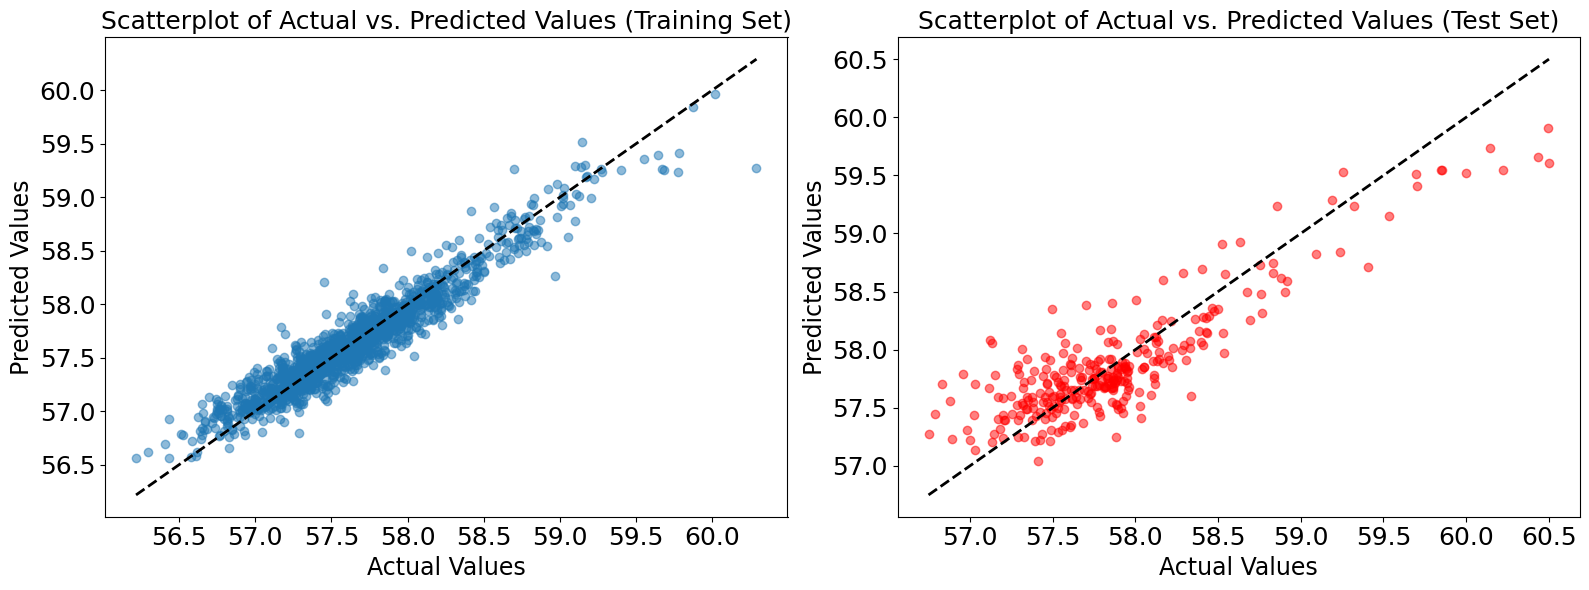

In [27]:
best_model = hgb_model

# Use the best model to make predictions on the test and training sets
y_train_pred = best_model.predict(X_train[final_selected_feature_names])  # Assuming you have X_train
y_test_pred = best_model.predict(X_test[final_selected_feature_names])

# Set a plain white background style for the plots
plt.style.use('default')

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # One row, two columns

# Subplot 1: Training Set
ax[0].scatter(Y_train, y_train_pred, alpha=0.5)
ax[0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)  # Line for perfect prediction
ax[0].set_xlabel('Actual Values', fontsize=17)
ax[0].set_ylabel('Predicted Values', fontsize=17)
ax[0].set_title('Scatterplot of Actual vs. Predicted Values (Training Set)', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=18)

# Subplot 2: Test Set
ax[1].scatter(Y_test, y_test_pred, alpha=0.5, color="red")
ax[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax[1].set_xlabel('Actual Values', fontsize=17)
ax[1].set_ylabel('Predicted Values', fontsize=17)
ax[1].set_title('Scatterplot of Actual vs. Predicted Values (Test Set)', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plots
plt.show()
